# Data Exploration

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/5j/d3djc2s11t3fm7573x763wvw0000gr/T/ipykernel_2841/687462750.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [104]:
# Load dataset 
df = pd.read_csv("data/soccer_leagues.csv")

# https://www.kaggle.com/datasets/oles04/top-leagues-player

# 2613 rows * 18 Columns initially

# Data Cleaning

### Drop Unneccasary Columns

In [105]:
# Drop First Column
df = df.drop("Unnamed: 0", axis=1)

#Drop player_agent column --> not useful for analysis and many null values
df = df.drop("player_agent", axis=1)

In [106]:
df.columns

Index(['name', 'full_name', 'age', 'height', 'nationality', 'place_of_birth',
       'price', 'max_price', 'position', 'shirt_nr', 'foot', 'club',
       'contract_expires', 'joined_club', 'player_agent', 'outfitter',
       'league'],
      dtype='object')

### Checking For Duplicate Players

In [107]:
df.duplicated().sum()

#List rows that have the same name
df.loc[df.duplicated(["name"], keep=False)].sort_values(["name"])

#Drop rows with duplicate names
df = df.drop_duplicates(["name"], keep="first").reset_index(drop=True)

df.duplicated().sum()

0

### Check for Null Values

In [108]:
# Count null values in each column 
df.isna().sum()


name                   0
full_name           1129
age                    0
height                10
nationality            0
place_of_birth        17
price                 10
max_price              6
position               0
shirt_nr               0
foot                  35
club                   0
contract_expires      68
joined_club            0
player_agent         259
outfitter           1605
league                 0
dtype: int64

In [109]:
#Drop all rows with any null values for the following columns
df = df.dropna(subset=['height', 'contract_expires', 'price', 'foot'])

#Fill the Na values in the full_name column
df["full_name"] = df["full_name"].fillna(df["name"])

# Turn the "Other" values in league into Null
def remove_other(word):
    if word == "Other":
        return None
    return word

df["league"] = df["league"].apply(remove_other)

### Rename Data

In [ ]:
# Shorten position titles
df['position'] = df['position'].replace({'Defender - Centre-Back': 'CB', 'midfield - Central Midfield': 'CM', 'Attack - Centre-Forward': 'S', 'Goalkeeper': 'GK', 'Defender - Right-Back': 'RB', 'Defender - Left-Back': 'LB', 'midfield - Defensive Midfield': 'CDM', 'Attack - Left Winger': 'LW', 'midfield - Attacking Midfield': 'CAM', 'Attack - Right Winger': 'RW', 'midfield - Right Midfield': 'RM', 'midfield - Left Midfield': 'LM', 'Attack - Second Striker': 'S', 'midfield': "CM"})

In [169]:
# def meters_to_feet(height):
#     return height * 3.28084

# df['height'].map(meters_to_feet)

# df.columns
# df.loc[df.duplicated(["name"], keep=False)].sort_values(["name"])

# Exploratory Data Analysis

In [163]:
df.shape # 2494 rows X 16 columns
df.describe()

,age,height,price,max_price,shirt_nr
count,2494.000000,2494.000000,2494.000000,2494.000000,2494.000000
mean,26.442261,1.830325,10.907518,17.769868,20.185646
std,4.599970,0.067367,15.919835,22.172345,17.794263
min,17.000000,1.630000,0.025000,0.025000,1.000000
25%,23.000000,1.780000,2.000000,3.500000,8.000000
50%,26.000000,1.830000,5.000000,10.000000,17.000000
75%,30.000000,1.880000,14.000000,24.000000,26.000000
max,42.000000,2.060000,180.000000,200.000000,99.000000


In [275]:
df.loc[df["price"] == df["price"].max()]

,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,outfitter,league
2113,Kylian Mbappé,Kylian Mbappé Lottin,24,1.78,France Cameroon,Bondy,180.0,200.0,S,7,right,Paris SG,2025-06-30,2018-07-01,Nike,Ligue1


In [276]:
df.loc[df["price"] == df["price"].min()]

,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,outfitter,league
904,Matthias Köbbing,Matthias Köbbing,25,1.96,Germany,Koblenz,0.025,0.100,GK,44,both,1.FC Köln,2025-06-30,2022-03-08,NaN,Bundesliga
1290,Matteo Fiorenza,Matteo Fiorenza,19,1.95,Italy,NaN,0.025,0.025,GK,73,right,Torino,2026-06-30,2022-07-01,NaN,SerieA


<Axes: title={'center': 'Price in Millions'}, xlabel='price'>

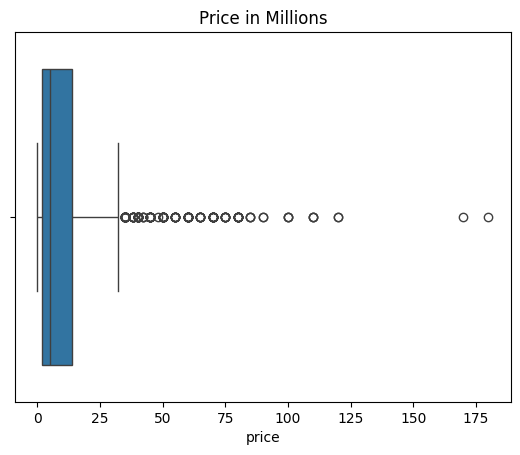

In [204]:
# Boxplot of player prirces
plt.title("Price in Millions")
sns.boxplot(data=df, x="price")

<Axes: xlabel='price', ylabel='Count'>

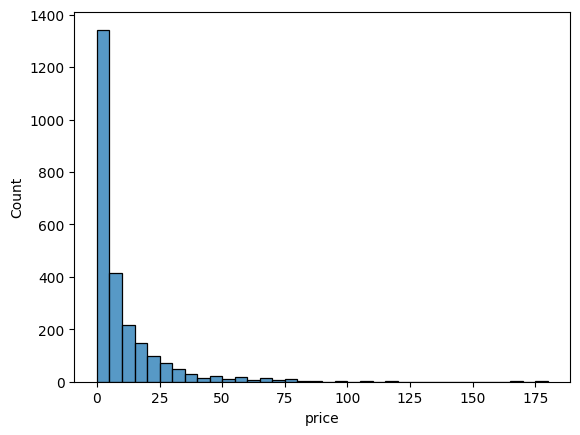

In [255]:

sns.histplot(data=df, x="price", binwidth=5)

<Axes: xlabel='league', ylabel='Count'>

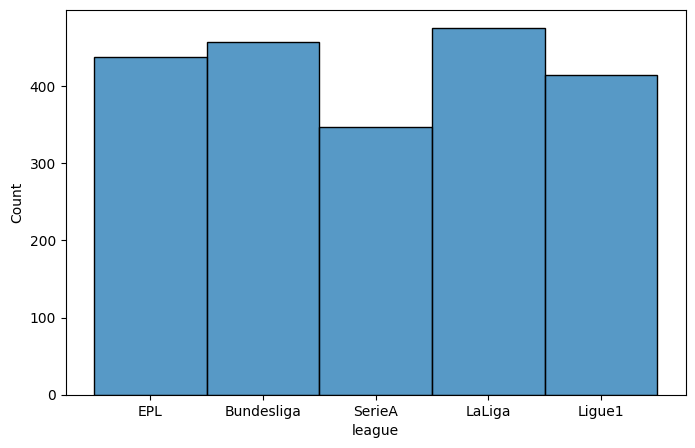

In [202]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="league")

<Axes: xlabel='age'>

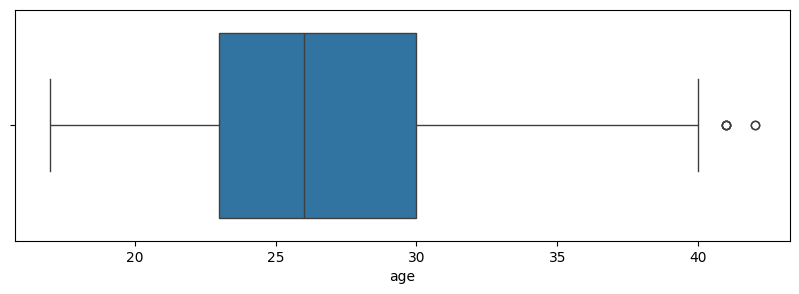

In [205]:
plt.figure(figsize=(10, 3))
sns.boxplot(data=df, x="age")

In [224]:
df['nationality'].value_counts()  # 419 Unique combinations of nationality's
df['club'].value_counts() # 113 unique clubs
df['outfitter'].value_counts() # 14 outfitters


outfitter
Nike            418
adidas          358
Puma            159
New Balance      11
Under Armour      9
Uhlsport          4
Mizuno            3
Lotto             3
Joma              2
Umbro             1
AB1               1
Sells             1
HashtagOne        1
Stanno            1
Name: count, dtype: int64

<Axes: xlabel='position', ylabel='Count'>

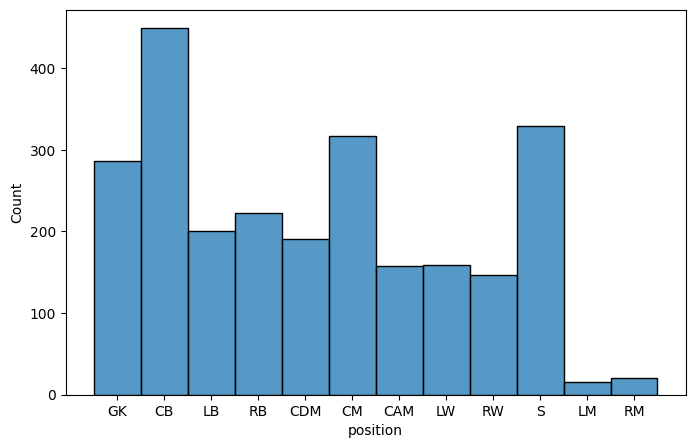

In [222]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="position")

In [226]:
df

,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,outfitter,league
0,Ederson,Ederson,29,1.88,Brazil Portugal,Osasco (SP),45.00,70.00,GK,31,left,Man City,2026-06-30,2017-07-01,Puma,EPL
1,Stefan Ortega,Stefan Ortega Moreno,30,1.85,Germany Spain,Hofgeismar,6.00,6.00,GK,18,right,Man City,2025-06-30,2022-07-01,NaN,EPL
2,Scott Carson,Scott Paul Carson,37,1.88,England,Whitehaven,0.25,6.00,GK,33,right,Man City,2023-06-30,2021-07-20,Puma,EPL
3,Rúben Dias,Rúben Santos Gato Alves Dias,26,1.87,Portugal,Amadora,75.00,75.00,CB,3,right,Man City,2027-06-30,2020-09-29,Nike,EPL
4,Nathan Aké,Nathan Benjamin Aké,28,1.80,Netherlands Cote d'Ivoire,Den Haag,35.00,40.00,CB,6,left,Man City,2025-06-30,2020-08-05,Nike,EPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2601,Ruan Levine,Ruan Levine,24,1.77,Brazil,NaN,0.10,0.10,RW,24,right,AC Ajaccio,2023-06-30,2022-09-20,NaN,None
2602,Moussa Djitté,Moussa Kalilou Djitté,23,1.80,Senegal,Diattouma,2.00,2.00,S,28,right,AC Ajaccio,2023-06-30,2023-01-31,NaN,None
2603,Mounaïm El Idrissy,منعم الإدريسي,24,1.81,France Morocco,Martigues,1.80,1.80,S,7,right,AC Ajaccio,2023-06-30,2019-07-01,NaN,None
2605,Romain Hamouma,Romain Hamouma,36,1.79,France Algeria,Montbéliard,0.60,7.00,S,17,right,AC Ajaccio,2023-06-30,2022-07-01,NaN,None


# Statistical Analysis

### What league has the highest average salary for its players?

<Axes: title={'center': 'Current Player Price (Millions) vs League'}, xlabel='league', ylabel='price'>

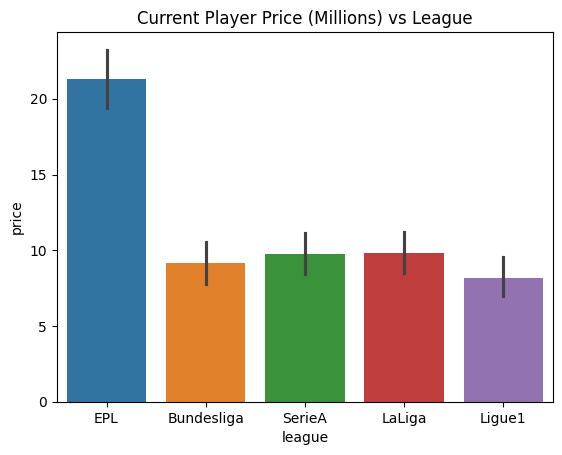

In [245]:
plt.title("Current Player Price (Millions) vs League")

sns.barplot(df, x="league", y="price", hue='league', legend=False)

In [246]:
print("EPL: " + str(df['price'].loc[df['league'] == 'EPL'].mean()))
print("Bundesliga: " + str(df['price'].loc[df['league'] == 'Bundesliga'].mean()))
print("Seria A: " + str(df['price'].loc[df['league'] == 'SerieA'].mean()))
print("LaLiga: " + str(df['price'].loc[df['league'] == 'LaLiga'].mean()))
print("Ligue1: " + str(df['price'].loc[df['league'] == 'Ligue1'].mean()))



EPL: 21.323744292237443
Bundesliga: 9.153336980306348
Seria A: 9.779899135446685
LaLiga: 9.81221052631579
Ligue1: 8.20024154589372


<Axes: title={'center': 'MAX Player Price (Millions) vs League'}, xlabel='league', ylabel='max_price'>

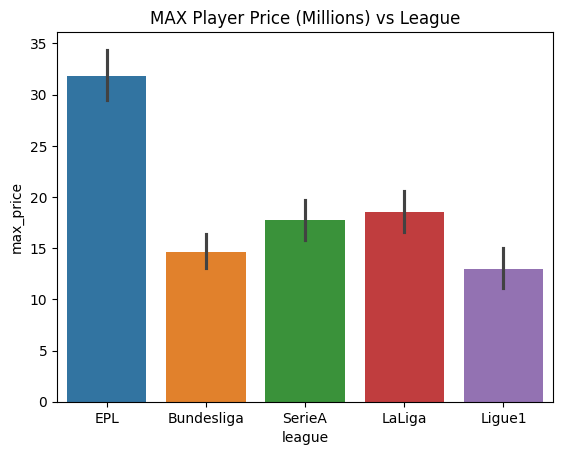

In [248]:
plt.title("MAX Player Price (Millions) vs League")

sns.barplot(df, x="league", y="max_price", hue='league', legend=False)

In [249]:
print("EPL: " + str(df['max_price'].loc[df['league'] == 'EPL'].mean()))
print("Bundesliga: " + str(df['max_price'].loc[df['league'] == 'Bundesliga'].mean()))
print("Seria A: " + str(df['max_price'].loc[df['league'] == 'SerieA'].mean()))
print("LaLiga: " + str(df['max_price'].loc[df['league'] == 'LaLiga'].mean()))
print("Ligue1: " + str(df['max_price'].loc[df['league'] == 'Ligue1'].mean()))

EPL: 31.82956621004566
Bundesliga: 14.638074398249454
Seria A: 17.736743515850144
LaLiga: 18.493157894736843
Ligue1: 12.948792270531401


### How does a players age relate to their salary?

<Axes: xlabel='age'>

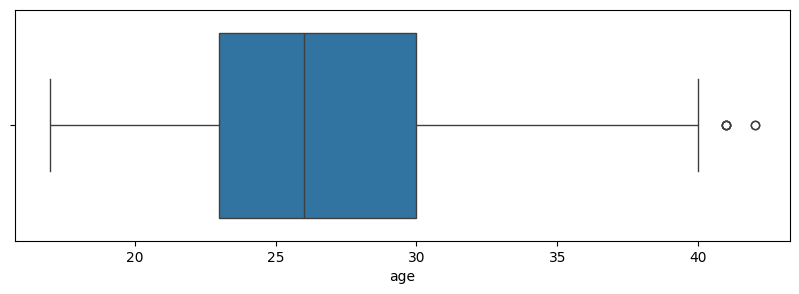

In [259]:
plt.figure(figsize=(10, 3))
sns.boxplot(data=df, x="age")

<Axes: title={'center': ' Player Price (Millions) vs Age'}, xlabel='age', ylabel='price'>

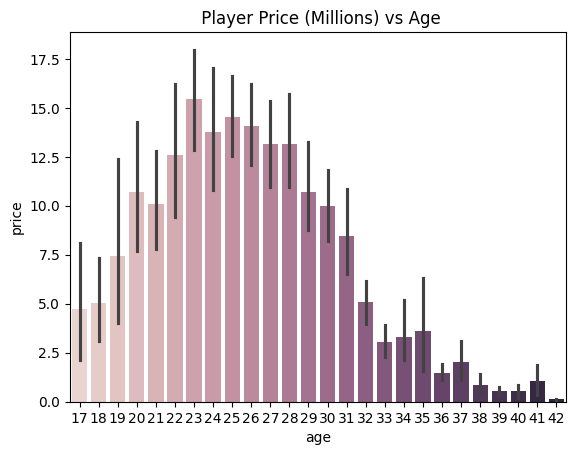

In [260]:
plt.title(" Player Price (Millions) vs Age")
sns.barplot(df, x="age", y="price", hue='age', legend=False)

### How does position affect price?

<Axes: xlabel='position', ylabel='Count'>

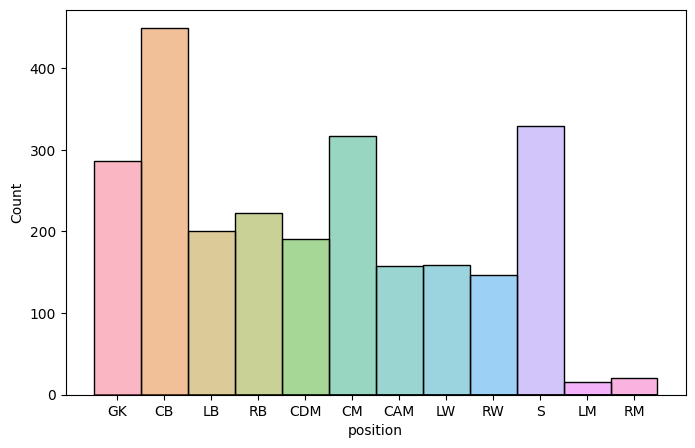

In [274]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="position", hue='position', legend=False)

<Axes: title={'center': ' Player Price (Millions) vs Position'}, xlabel='position', ylabel='price'>

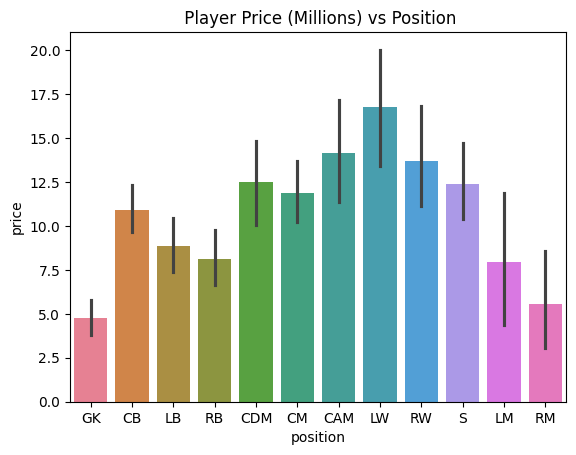

In [271]:
plt.title(" Player Price (Millions) vs Position")
sns.barplot(df, x="position", y="price", hue='position', legend=False)